In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1 : load Dataset

In [ ]:
train_dataset = datasets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = datasets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

torch.Size([28, 28])


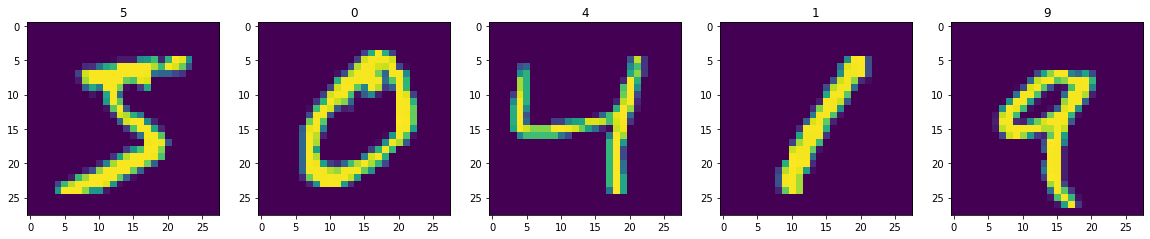

In [ ]:
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt

train_data = train_dataset.data

print(train_data[0].shape)

fig, axs = plt.subplots(1, 5)
fig.set_size_inches(20,10)
for i, pic in enumerate(train_data[0:5]):
  axs[i].imshow(pic)
  axs[i].set_title(int(train_dataset.targets[i]))

# Step 2 : Making iterable dataset

In [ ]:
#batchsize --> nb of examples that goes forward, backward at each iteration
#iteration --> batchsize goes forward then backward only once
#epoch --> when all the dataset goes through the neural network once.


batchsize = 100
nb_iter = 1200
nb_epochs = int((batchsize*nb_iter)/len(train_dataset))
#Iterateur 

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batchsize, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batchsize, shuffle=True)

print(nb_epochs)

2


# Step 3 : Create the model class



In [80]:
class ConvNet(nn.Module):
 
  def __init__(self):
    super(ConvNet, self).__init__()

    #Convolution 1 + linear rectification
    self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
    self.relu1 = nn.ReLU()

    #Max Pool 1
    self.maxPool1 = nn.MaxPool2d(kernel_size=2)

    #At this stage, one picture is of size 12*12 ((28-5+1)/2)

    #Convolution 2 + linear rectification
    self.cnn2 = nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size=5, stride=1, padding=0)
    self.relu2 = nn.ReLU()

    #Max Pool 2
    self.maxpool2 = nn.MaxPool2d(kernel_size=2)

    #At this stage, one picture is of size 4*4 ((12-5+1)/2)

    #fully connected layer. We have 10 as output because 10 possible classes: [0,1,2,3,4,5,6,7,8,9].
    self.fully_co = nn.Linear(32 * 4 * 4, 10)


  def forward(self, input):

    #conv1
    output = self.cnn1(input)
    output = self.relu1(output)

    #max pool1
    output = self.maxPool1(output)

    #conv2
    output = self.cnn2(output)
    output = self.relu2(output)
    
    #max pool2
    output = self.maxpool2(output)

    #here output is of size (32,4,4)
    #flatten our data before passing it to our fully connected layer

    output = output.view(output.size(0), -1)
    output = self.fully_co(output)

    return output

# Step 4: Instanciate model class

In [81]:
print(torch.cuda.device_count())

0


In [82]:
torch.cuda.is_available()

False

In [83]:
model = ConvNet()

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)
model.to(device)

cpu


ConvNet(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fully_co): Linear(in_features=512, out_features=10, bias=True)
)

# Step 5: Instanciate loss class

In [84]:
criterion = torch.nn.CrossEntropyLoss()

#Step 6: Instanciate optimizer ckass

In [85]:
learning_rate = 0.1

optim = torch.optim.Adam(params= model.parameters(), lr = learning_rate)

#Step 7: Train and test the model


In [86]:
def test_model(test_loader, model, device):

  correct = 0
  total = 0

  for images, labels in test_loader:

    images = images.to(device)
    labels = labels.to(device)

    outputs = model(images)

    _, predicted = torch.max(outputs, 1)

    total += labels.size(0)

    correct += (predicted == labels).sum()

  accuracy = 100 * float(correct) / float(total)
    
  return accuracy

In [88]:
iter = 0
for epoch in range(nb_epochs):
    for i, (images, labels) in enumerate(train_loader):

        # images = images.requires_grad_().to(device)
        images = images.to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optim.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        criterion = loss(outputs, labels)

        # Getting gradients w.r.t. parameters
        criterion.backward()

        # Updating parameters
        optim.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy on the test set        
            accuracy = test_model(test_loader, model, device)

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy on test set: {}'.format(iter, criterion.item(), accuracy))

Iteration: 500. Loss: 2.2808356285095215. Accuracy on test set: 9.74
Iteration: 1000. Loss: 2.2840118408203125. Accuracy on test set: 11.35
